# Lab2 (Statystyka Opisowa)

## Zadanie 1
Wczytaj plik loty.csv zawierający dane dotyczące liczby pasażerów pewnej linii lotniczej w kolejnych miesiącach i latach, a następnie wykonaj polecenia: a) sprawdź, jakie wartości zawiera plik i jaki jest typ danych (class(dane)); b) wyznacz i zinterpretuj podstawowe miary statystyczne (średnia, mediana, pierwszy i trzeci kwartyl, odchylenie standardowe, współczynnik zmienności); c) narysuj histogramy liczebności dla danych z kolejnych lat; zautomatyzuj rysowanie za pomocą pętli „for”; zadeklaruj tytuły kolejnych histogramów odwołując się do etykiet danych; przedstaw wszystkie wykresy w jednym oknie; d) porównaj dane z kolejnych lat za pomocą wykresów pudełkowych

,1955,1956,1957,1958,1959,1960
,<int>,<int>,<int>,<int>,<int>,<int>
Styczeń,242,284,315,340,360,417
Luty,233,277,301,318,342,391
Marzec,267,317,356,362,406,419
Kwiecień,269,313,348,348,396,461
Maj,270,318,355,363,420,472
Czerwiec,315,374,422,435,472,535


'data.frame':	12 obs. of  6 variables:
 $ 1955: int  242 233 267 269 270 315 364 347 312 274 ...
 $ 1956: int  284 277 317 313 318 374 413 405 355 306 ...
 $ 1957: int  315 301 356 348 355 422 465 467 404 347 ...
 $ 1958: int  340 318 362 348 363 435 491 505 404 359 ...
 $ 1959: int  360 342 406 396 420 472 548 559 463 407 ...
 $ 1960: int  417 391 419 461 472 535 622 606 508 461 ...


[1] "data.frame"

      Rok  Średnia Mediana     Q1     Q3 Odchylenie_std Wsp_zmienności
1955 1955 284.0000   272.0 260.75 312.75       42.14046       14.83819
1956 1956 328.2500   315.0 300.50 359.75       47.86178       14.58089
1957 1957 368.4167   351.5 330.75 408.50       57.89090       15.71343
1958 1958 381.0000   360.5 339.25 411.75       64.53047       16.93713
1959 1959 428.3333   406.5 387.50 465.25       69.83010       16.30275
1960 1960 476.1667   461.0 418.50 514.75       77.73713       16.32561


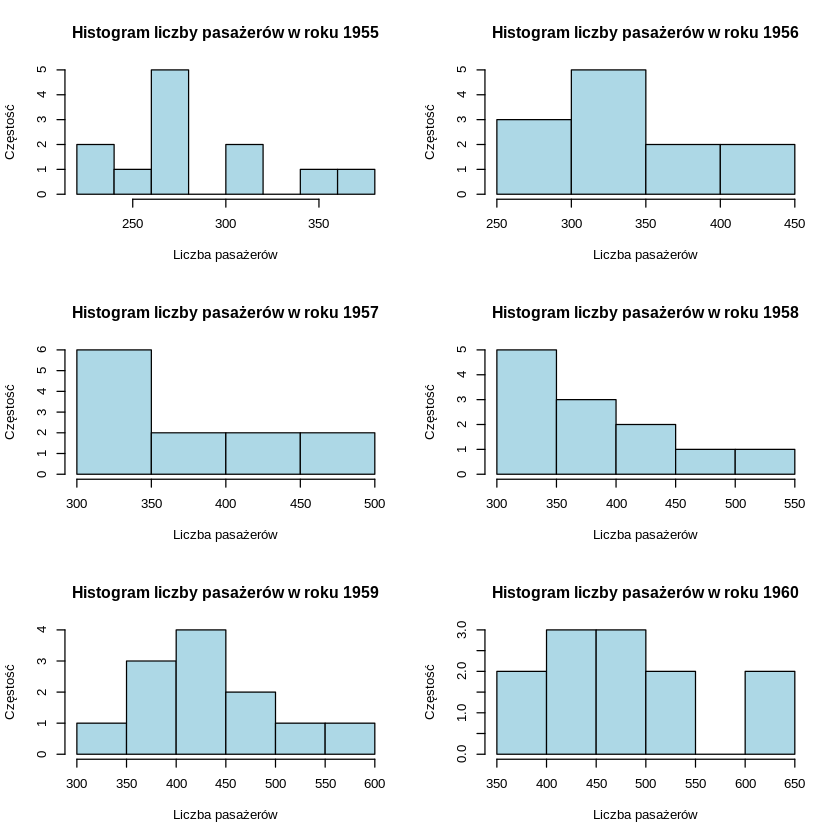

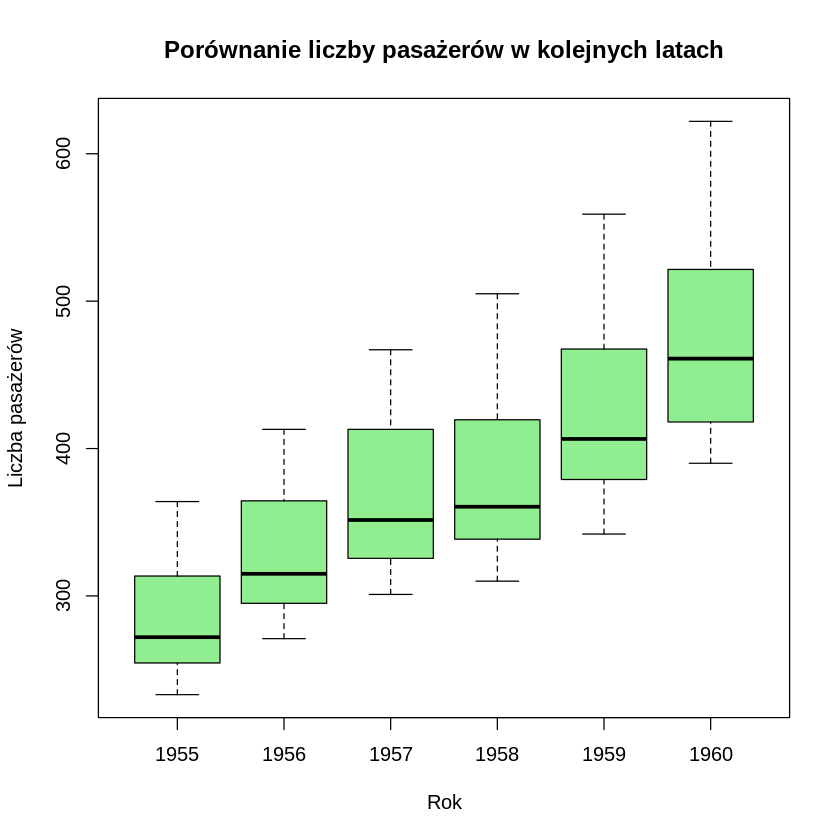

In [6]:
# Wyłączenie ostrzeżeń
options(warn = -1)
# a) Wczytanie danych z pliku CSV i sprawdzenie typu danych
dane <- read.csv("dane/loty.csv", sep=";", header=TRUE, check.names=FALSE)

# Przypisanie nazw miesięcy jako nazw wierszy
miesiace <- c("Styczeń", "Luty", "Marzec", "Kwiecień", "Maj", "Czerwiec", 
              "Lipiec", "Sierpień", "Wrzesień", "Październik", "Listopad", "Grudzień")
rownames(dane) <- miesiace

# Sprawdzenie struktury i typu danych
head(dane)
str(dane)
class(dane)

# b) Wyznaczenie podstawowych miar statystycznych
statystyki <- data.frame(
  Rok = names(dane),
  Średnia = sapply(dane, mean),
  Mediana = sapply(dane, median),
  Q1 = sapply(dane, function(x) quantile(x, 0.25)),
  Q3 = sapply(dane, function(x) quantile(x, 0.75)),
  Odchylenie_std = sapply(dane, sd),
  Wsp_zmienności = sapply(dane, function(x) sd(x)/mean(x)*100)
)
print(statystyki)

# c) Histogramy dla danych z kolejnych lat z użyciem pętli for
# Przygotowanie okna do wyświetlenia wielu wykresów
par(mfrow=c(3, 2))  # Układ 3x2 dla 6 lat

# Pętla for do rysowania histogramów
for (i in 1:ncol(dane)) {
  hist(dane[,i], 
       main=paste("Histogram liczby pasażerów w roku", names(dane)[i]),
       xlab="Liczba pasażerów",
       ylab="Częstość",
       col="lightblue")
}

# d) Porównanie danych z kolejnych lat za pomocą wykresów pudełkowych
# Resetowanie układu wykresów
par(mfrow=c(1,1))

# Wykres pudełkowy
boxplot(dane, 
        main="Porównanie liczby pasażerów w kolejnych latach",
        xlab="Rok",
        ylab="Liczba pasażerów",
        col="lightgreen")

## Zadanie 2
2. Wczytaj plik oceny.csv i wykonaj następujące polecenia: a) sprawdź typ danych wczytanych z pliku i zwróć uwagę na długości kolejnych zmiennych oraz sposób zapisu; b) wczytaj dane ponownie, zamieniając przecinki na kropki (opcja dec=”,”); c) wyznacz i zinterpretuj podstawowe miary statystyczne; w przypadku niepełnej długości danych posłuż się funkcją na.omit; d) narysuj diagramy odcinkowe dla danych z kolejnych grup; zautomatyzuj rysowanie za pomocą pętli „for”; zadeklaruj tytuły kolejnych histogramów odwołując się do etykiet danych; wszystkie wykresy umieść w jednym oknie; UWAGA! Polecenie discrete.histogram należy do pakietu „arm” e) porównaj dane z kolejnych lat za pomocą wykresów pudełkowych; f) sporządź szeregi rozdzielcze punktowe ocen w poszczególnych grupach (table); g) przedstaw dane z szeregów rozdzielczych na wykresach kołowych. 

### Kod

'data.frame':	31 obs. of  4 variables:
 $ grupa.M1: num  4.5 2 4.5 5 5 5 4.5 5 4 3 ...
 $ grupa.M2: num  4.5 4 3 4.5 3.5 4 4 5 5 2 ...
 $ grupa.M3: num  3 3 5 5 3.5 5 5 5 3.5 3.5 ...
 $ grupa.M4: num  2 3 3.5 3 3 5 4 2 3.5 5 ...


,grupa.M1,grupa.M2,grupa.M3,grupa.M4
,<dbl>,<dbl>,<dbl>,<dbl>
1,4.5,4.5,3.0,2.0
2,2.0,4.0,3.0,3.0
3,4.5,3.0,5.0,3.5
4,5.0,4.5,5.0,3.0
5,5.0,3.5,3.5,3.0
6,5.0,4.0,5.0,5.0


$grupa.M1
          Średnia           Mediana               Min               Max 
        4.3181818         4.5000000         2.0000000         5.0000000 
         Odch_std Liczba_obserwacji 
        0.9816498        11.0000000 

$grupa.M2
          Średnia           Mediana               Min               Max 
        3.5344828         3.5000000         2.0000000         5.0000000 
         Odch_std Liczba_obserwacji 
        0.8653141        29.0000000 

$grupa.M3
          Średnia           Mediana               Min               Max 
         3.730769          3.500000          2.000000          5.000000 
         Odch_std Liczba_obserwacji 
         1.022064         26.000000 

$grupa.M4
          Średnia           Mediana               Min               Max 
         3.362069          3.000000          2.000000          5.000000 
         Odch_std Liczba_obserwacji 
         1.007973         29.000000

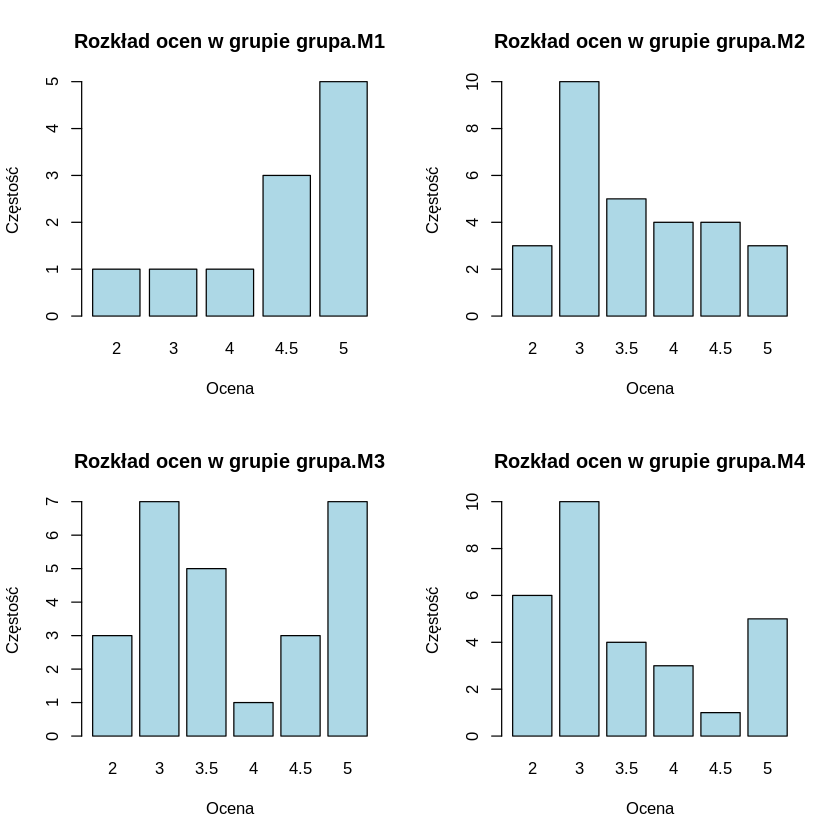

$grupa.M1

  2   3   4 4.5   5 
  1   1   1   3   5 

$grupa.M2

  2   3 3.5   4 4.5   5 
  3  10   5   4   4   3 

$grupa.M3

  2   3 3.5   4 4.5   5 
  3   7   5   1   3   7 

$grupa.M4

  2   3 3.5   4 4.5   5 
  6  10   4   3   1   5 


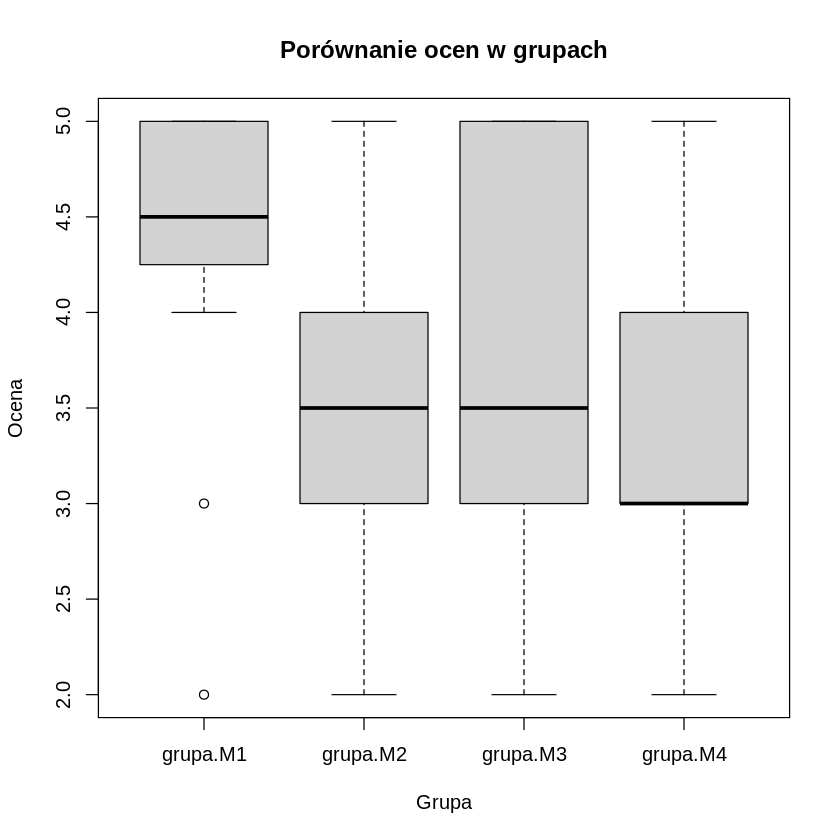

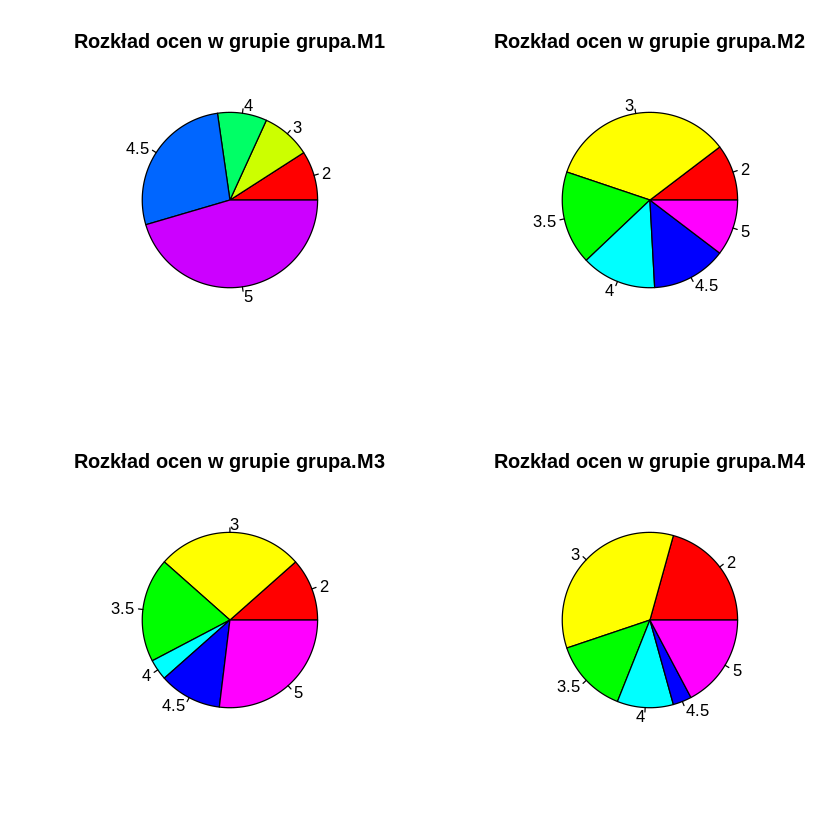

In [19]:
# # a) Wczytanie danych i sprawdzenie typu
# oceny <- read.csv("dane/oceny.csv")
# str(oceny)
# summary(oceny)
# head(oceny)

# b) Ponowne wczytanie z zamianą przecinków na kropki
oceny <- read.csv("dane/oceny.csv", sep=";", dec=",")
str(oceny)
head(oceny)

# c) Podstawowe miary statystyczne
# Obliczamy miary statystyczne dla każdej kolumny
miary_statystyczne <- lapply(oceny, function(x) {
  c(
    Średnia = mean(na.omit(x)),
    Mediana = median(na.omit(x)),
    Min = min(na.omit(x)),
    Max = max(na.omit(x)),
    Odch_std = sd(na.omit(x)),
    Liczba_obserwacji = length(na.omit(x))
  )
})
miary_statystyczne

# d) Diagramy odcinkowe dla każdej grupy (bez pakietu arm)
# Alternatywne rozwiązanie z użyciem barplot zamiast discrete.histogram

# Ustawienie podziału okna wykresów
n_cols <- ncol(oceny)
n_rows <- ceiling(n_cols/2)
par(mfrow=c(n_rows, 2))

# Pętla do automatyzacji rysowania wykresów
for (i in 1:ncol(oceny)) {
  nazwa_kolumny <- names(oceny)[i]
  dane <- na.omit(oceny[[i]])
  
  # Tworzymy tabelę częstości
  freq_table <- table(dane)
  
  # Rysujemy wykres słupkowy (alternatywa dla discrete.histogram)
  barplot(freq_table, 
          main=paste("Rozkład ocen w grupie", nazwa_kolumny),
          xlab="Ocena", ylab="Częstość",
          col="lightblue")
}

# e) Porównanie danych za pomocą wykresów pudełkowych
par(mfrow=c(1, 1))  # Resetowanie podziału okna
boxplot(oceny, main="Porównanie ocen w grupach", 
        xlab="Grupa", ylab="Ocena")

# f) Szeregi rozdzielcze punktowe
szeregi <- lapply(oceny, function(x) table(na.omit(x)))
szeregi

# g) Wykresy kołowe dla szeregów rozdzielczych
par(mfrow=c(n_rows, 2))  # Dostosowanie podziału okna
for (i in 1:ncol(oceny)) {
  nazwa_kolumny <- names(oceny)[i]
  pie(szeregi[[i]], 
      main=paste("Rozkład ocen w grupie", nazwa_kolumny),
      col=rainbow(length(szeregi[[i]])))
}

### Metoda

W zadaniu wykorzystujemy podstawowe metody statystyki opisowej do analizy i wizualizacji danych ocen, korzystając wyłącznie z funkcji wbudowanych w bazowy pakiet R:

1. **Statystyki opisowe** - obliczanie podstawowych miar położenia (średnia, mediana), rozproszenia (odchylenie standardowe) i zakresu (min, max).
2. **Wizualizacja rozkładów** - używamy wykresów słupkowych (`barplot()`), wykresów pudełkowych (`boxplot()`) i wykresów kołowych (`pie()`).
3. **Tabelaryzacja danych** - tworzymy szeregi rozdzielcze punktowe za pomocą funkcji `table()`.
4. **Automatyzacja analizy** - wykorzystujemy pętle i funkcje do automatyzacji powtarzalnych operacji na różnych grupach danych.

### Opis

Kod wykonuje następujące operacje:

1. **Wczytanie i analiza struktury danych**:
   - Pierwsze wczytanie pokazuje strukturę surowych danych
   - Funkcje `str()`, `summary()` i `head()` wyświetlają strukturę i początek danych
   - Pozwala to zidentyfikować problemy, takie jak nieprawidłowy separator dziesiętny

2. **Ponowne wczytanie z poprawną specyfikacją**:
   - Używamy `sep=";"` do oznaczenia separatora kolumn (średnik)
   - Używamy `dec=","` do określenia, że przecinek jest separatorem dziesiętnym (format polski)
   - Po tej operacji dane powinny być prawidłowo zinterpretowane jako liczby

3. **Obliczenie miar statystycznych**:
   - Dla każdej kolumny (grupy) obliczamy średnią, medianę, min, max, odchylenie standardowe
   - Funkcja `na.omit()` eliminuje brakujące wartości z obliczeń
   - Do automatyzacji używamy funkcji `lapply()`, która wykonuje te same obliczenia dla każdej kolumny

4. **Tworzenie wykresów słupkowych** (zamiast histogramów odcinkowych z pakietu arm):
   - Dzielimy okno wykresu na części za pomocą `par(mfrow=c(n_rows, 2))`
   - W pętli dla każdej grupy:
     - Tworzymy tabelę częstości za pomocą `table()`
     - Tworzymy wykres słupkowy (`barplot()`) pokazujący częstość występowania poszczególnych ocen
     - Dynamicznie generujemy tytuły wykresów używając `paste()`

5. **Tworzenie wykresów pudełkowych**:
   - Resetujemy podział okna i tworzymy zbiorczy wykres pudełkowy 
   - Pozwala to na wizualne porównanie rozkładów ocen we wszystkich grupach jednocześnie

6. **Tworzenie szeregów rozdzielczych**:
   - Funkcja `table()` zlicza wystąpienia każdej wartości oceny w danych
   - Otrzymujemy tabelę częstości dla każdej grupy

7. **Tworzenie wykresów kołowych**:
   - Ponownie dzielimy okno wykresu
   - Dla każdej grupy tworzymy wykres kołowy pokazujący proporcje ocen
   - Używamy kolorów z palety `rainbow()` dla lepszej czytelności

### Interpretacja

Wyniki tej analizy pozwalają na kompleksowe porównanie ocen między grupami:

1. **Statystyki opisowe** pokazują:
   - Średni poziom ocen w każdej grupie, co pozwala ocenić ogólny poziom osiągnięć
   - Rozproszenie ocen (odchylenie standardowe), które informuje o zróżnicowaniu wyników
   - Wartości ekstremalne (min i max), wskazujące na zakres ocen

2. **Wykresy słupkowe** zastępujące histogramy odcinkowe wizualizują rozkład ocen w każdej grupie, co pozwala zidentyfikować:
   - Najczęściej występujące oceny (dominanty)
   - Modalność (jednomodalny, wielomodalny rozkład)
   - Symetrię lub asymetrię rozkładu ocen

3. **Wykresy pudełkowe** umożliwiają bezpośrednie porównanie grup pod kątem:
   - Mediany ocen (pozioma linia w pudełku)
   - Rozrzutu ocen (wysokość pudełka to przedział międzykwartylowy)
   - Wartości odstających (punkty poza "wąsami"), które mogą wskazywać na wyjątkowe wyniki

4. **Szeregi rozdzielcze i wykresy kołowe** pokazują:
   - Dokładne liczby poszczególnych ocen w każdej grupie
   - Proporcje ocen przedstawione wizualnie, co ułatwia porównanie struktury ocen między grupami

Dla danych ocen, analiza ta może pomóc odpowiedzieć na pytania:
- Które grupy osiągają najlepsze/najgorsze wyniki?
- Jak rozkładają się oceny w poszczególnych grupach?
- Czy rozkłady ocen są podobne między grupami, czy istnieją znaczące różnice?
- Czy występują wartości odstające (wyjątkowo wysokie lub niskie oceny)?

Analiza może służyć do podejmowania decyzji edukacyjnych, takich jak identyfikacja grup wymagających dodatkowego wsparcia czy monitorowanie efektywności różnych metod nauczania.


## Zadanie 3 
3. Wczytaj plik truskawki.csv i wykonaj następujące polecenia: a) sprawdź typ danych wczytanych z pliku i zwrócić uwagę na długości kolejnych zmiennych; wyświetl dane zwracając uwagę na brakujące pomiary; b) wyznacz i zinterpretuj podstawowe miary statystyczne; w przypadku danych „plon2010” wykorzystaj funkcję na.omit; c) sporządź szeregi rozdzielcze przedziałowe plonów w poszczególnych latach (cut); d) przedstaw dane z szeregów rozdzielczych na wykresach kołowych; e) narysuj histogramy probabilistyczne (freq=FALSE) dla plonów z kolejnych lat wykorzystując szeregi rozdzielcze z punktu (c); zautomatyzuj rysowanie za pomocą pętli „for”; zadeklaruj tytuły kolejnych histogramów odwołując się do etykiet danych; wszystkie wykresy przedstaw w jednym oknie; f) porównaj dane z kolejnych lat za pomocą wykresów pudełkowych. 

In [ ]:
# Wczytanie danych
truskawki <- read.csv("dane/truskawki.csv", sep=";", header=TRUE)

In [32]:
# b) Podstawowe miary statystyczne
summary(truskawki$plon.2000)
summary(na.omit(truskawki$plon.2010))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   84.0   106.5   112.0   112.3   118.0   140.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   27.0    99.0   110.0   109.2   121.5   150.0 

In [33]:
# c) Szeregi rozdzielcze przedziałowe
szereg_2000 <- table(cut(truskawki$plon.2000, breaks=5))
szereg_2010 <- table(cut(na.omit(truskawki$plon.2010), breaks=5))
print(szereg_2000)
print(szereg_2010)


(83.9,95.2]  (95.2,106]   (106,118]   (118,129]   (129,140] 
          2          16          31          19           2 

(26.9,51.6] (51.6,76.2]  (76.2,101]   (101,125]   (125,150] 
          1           1          11          23           7 


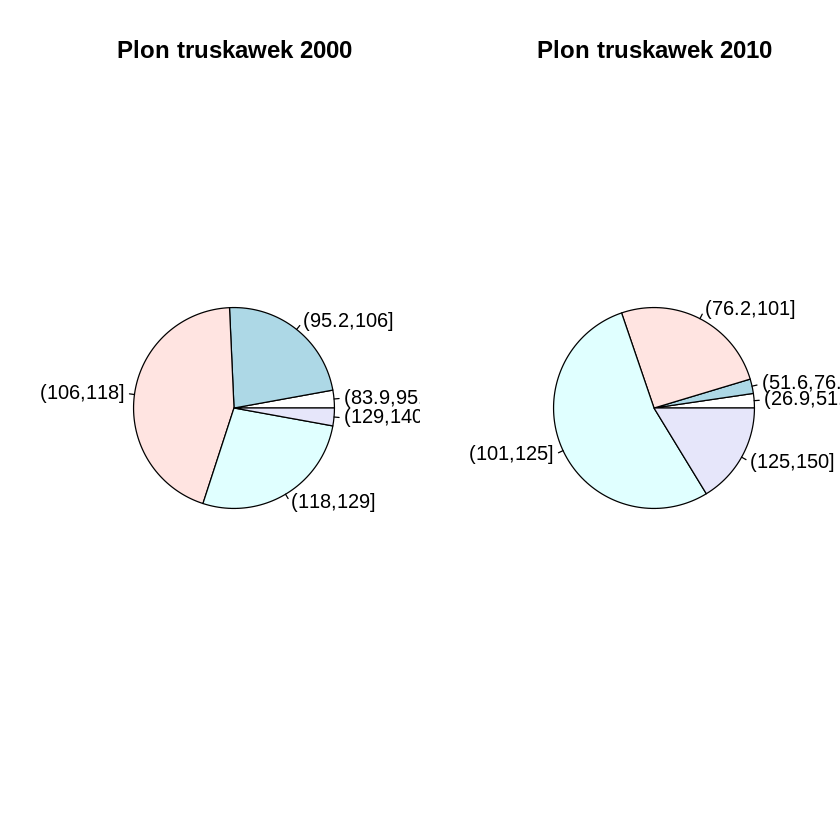

In [34]:
# d) Wykresy kołowe
par(mfrow=c(1,2))
pie(szereg_2000, main="Plon truskawek 2000")
pie(szereg_2010, main="Plon truskawek 2010")

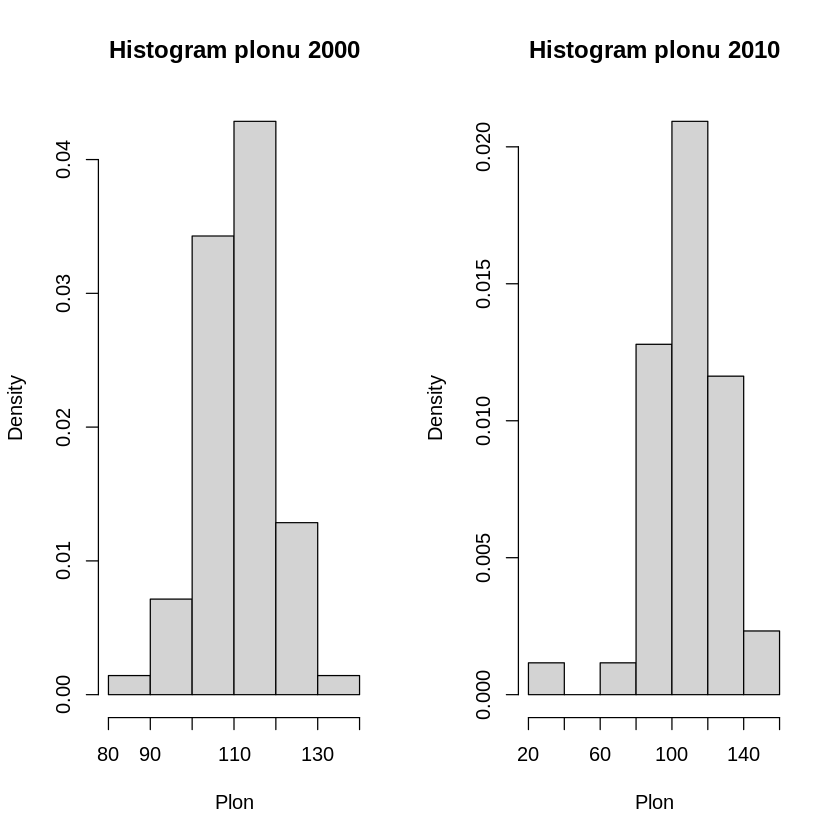

In [35]:
# e) Histogramy probabilistyczne
par(mfrow=c(1,2))
lata <- c(2000, 2010)
for(i in 1:2) {
  rok <- lata[i]
  nazwa_kolumny <- paste0("plon.", rok)
  dane_rok <- na.omit(truskawki[[nazwa_kolumny]])
  hist(dane_rok, freq=FALSE, breaks=5, 
       main=paste("Histogram plonu", rok), 
       xlab="Plon")
}

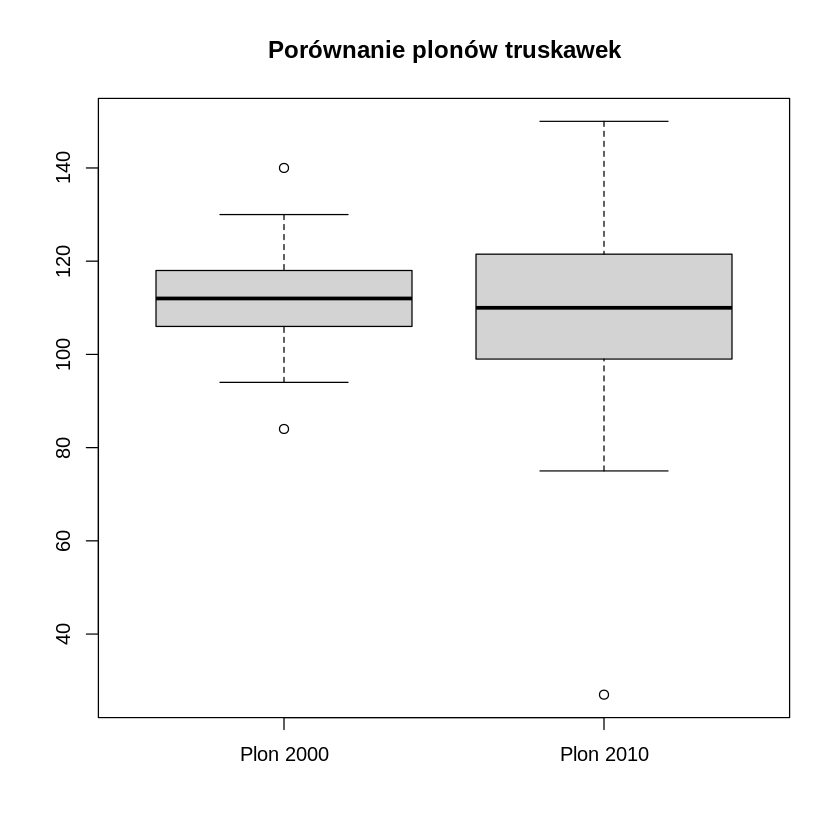

In [36]:
# f) Wykresy pudełkowe
par(mfrow=c(1,1))
boxplot(truskawki$plon.2000, na.omit(truskawki$plon.2010), 
        names=c("Plon 2000", "Plon 2010"), 
        main="Porównanie plonów truskawek")


### Metoda

Analiza statystyczna danych o plonach truskawek z lat 2000 i 2010 jest przeprowadzana za pomocą podstawowych metod statystyki opisowej. Dane są wczytywane z pliku CSV, a następnie przeprowadzane są różne analizy i wizualizacje. W R, podczas wczytywania danych, spacje w nazwach kolumn są automatycznie zamieniane na kropki, co trzeba uwzględnić w dalszej analizie.

### Opis

1. **Wczytanie danych** - Plik CSV jest wczytywany z użyciem funkcji `read.csv()` z określeniem separatora (;) i nagłówków.

2. **Sprawdzenie typu danych i długości**:
   - Używamy funkcji `str()` do wyświetlenia struktury danych
   - Funkcja `head()` pozwala zobaczyć pierwsze wiersze
   - Sprawdzamy dokładne nazwy kolumn, które w R mają kropki zamiast spacji
   - Funkcja `is.na()` identyfikuje brakujące wartości

3. **Wyznaczenie podstawowych miar statystycznych**:
   - Używamy `summary()` dla danych z 2000 roku
   - Stosujemy `na.omit()` przed `summary()` dla danych z 2010, aby pominąć brakujące wartości

4. **Tworzenie szeregów rozdzielczych przedziałowych**:
   - Funkcja `cut()` dzieli dane na 5 równych przedziałów
   - Funkcja `table()` zlicza obserwacje w każdym przedziale

5. **Wykresy kołowe**:
   - Ustawiamy układ wykresów za pomocą `par(mfrow=c(1,2))`
   - Tworzymy wykresy kołowe funkcją `pie()` dla szeregów rozdzielczych

6. **Histogramy probabilistyczne**:
   - Używamy pętli `for` do automatyzacji procesu
   - Tworzymy dynamiczne nazwy kolumn z `paste0()`
   - Parametr `freq=FALSE` zapewnia normalizację histogramu do gęstości prawdopodobieństwa
   - Dynamiczne tytuły tworzone są przy użyciu `paste()`

7. **Wykresy pudełkowe**:
   - Przywracamy standardowy układ wykresu
   - Porównujemy rozkłady z obu lat za pomocą wykresu pudełkowego

### Interpretacja

Analiza plonów truskawek z lat 2000 i 2010 pozwala zauważyć:

1. **Z podstawowych miar statystycznych** możemy określić centralne tendencje (średnia, mediana) oraz rozproszenie danych (min, max, kwartyle). Porównanie tych wartości między latami pokazuje, czy nastąpiła zmiana w typowych wielkościach plonów.

2. **Szeregi rozdzielcze przedziałowe** pokazują, jak dane rozkładają się w przedziałach wartości, co pozwala zidentyfikować najbardziej popularne zakresy plonów.

3. **Wykresy kołowe** wizualizują procentowy udział plonów z poszczególnych przedziałów, ułatwiając porównanie struktury plonów między latami.

4. **Histogramy probabilistyczne** pokazują kształt rozkładu plonów, co pomaga zidentyfikować modalne wartości oraz ocenić symetrię rozkładu.

5. **Wykresy pudełkowe** umożliwiają bezpośrednie porównanie:
   - Mediany (środkowa linia w pudełku)
   - Rozstępu międzykwartylowego (wysokość pudełka)
   - Występowania potencjalnych wartości odstających

Wszystkie te analizy razem pozwalają ocenić, czy w ciągu dekady nastąpiły istotne zmiany w plonach truskawek, zarówno pod względem wielkości, jak i zmienności.


## Extra (Interpretacja rezultatow z zadania 3)


### Metoda

Mamy do czynienia z szeregami rozdzielczymi przedziałowymi, które grupują wartości plonów truskawek w poszczególne klasy (przedziały). Te szeregi powstały w wyniku zastosowania funkcji `cut()` do danych o plonach z lat 2000 i 2010, a następnie zliczenia obserwacji w każdym przedziale funkcją `table()`.

### Opis

Szeregi rozdzielcze dla roku 2000:
- (83.9, 95.2]: 2 obserwacje
- (95.2, 106]: 16 obserwacji
- (106, 118]: 31 obserwacji
- (118, 129]: 19 obserwacji
- (129, 140]: 2 obserwacje

Szeregi rozdzielcze dla roku 2010:
- (26.9, 51.6]: 1 obserwacja
- (51.6, 76.2]: 1 obserwacja
- (76.2, 101]: 11 obserwacji
- (101, 125]: 23 obserwacje
- (125, 150]: 7 obserwacji

### Interpretacja

1. **Porównanie zakresów danych**:
   - Plony w 2000 roku miały znacznie węższy zakres (83.9-140) niż w 2010 roku (26.9-150)
   - W 2010 roku pojawiły się znacznie niższe wartości plonów, sięgające nawet poniżej 50 jednostek

2. **Tendencja centralna**:
   - W 2000 roku najwięcej obserwacji (31) przypadło na przedział (106, 118], co sugeruje, że typowy plon oscylował wokół tych wartości
   - W 2010 roku najwięcej obserwacji (23) znalazło się w przedziale (101, 125], co może wskazywać na pewne przesunięcie typowych plonów w górę

3. **Rozproszenie danych**:
   - Dane z 2000 roku są bardziej skupione - 66 z 70 obserwacji (94%) mieści się w trzech środkowych przedziałach
   - Dane z 2010 roku wykazują większe rozproszenie - obserwacje są rozłożone mniej równomiernie, z pojedynczymi przypadkami bardzo niskich plonów

4. **Zmiany w strukturze plonów**:
   - W 2000 roku rozkład był bardziej zbliżony do symetrycznego, z koncentracją wokół wartości środkowych
   - W 2010 roku rozkład stał się bardziej asymetryczny, z "długim ogonem" w kierunku niższych wartości, ale jednocześnie z większą liczbą bardzo wysokich plonów

5. **Implikacje gospodarcze**:
   - Większa zmienność plonów w 2010 roku może świadczyć o zwiększonym ryzyku w produkcji truskawek
   - Pojawienie się bardzo niskich plonów w 2010 roku może wskazywać na problemy niektórych producentów (np. choroby, niekorzystne warunki)
   - Jednocześnie więcej gospodarstw osiągnęło bardzo wysokie plony (powyżej 125 jednostek) w 2010 roku (7 obserwacji) niż w 2000 roku (2 obserwacje)

6. **Możliwe przyczyny zmian**:
   - Zwiększona rozpiętość plonów może wynikać z polaryzacji metod uprawy (tradycyjne vs. nowoczesne)
   - Zmiany klimatyczne mogą zwiększać zmienność plonów, powodując ekstremalne wartości
   - Nowe odmiany truskawek o wyższym potencjale plonowania, ale też większej wrażliwości na warunki uprawy
